In [2]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data269


In [3]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/房价预测')

In [5]:
# 导入需要用到的package
import numpy as np
import json
import matplotlib.pyplot as plt

# 读入训练数据
datafile = '房价预测/data/data.txt'
data = np.loadtxt(datafile,delimiter=',')
x,y=data[:,0],data[:,1]

#数据归一化
normdata=np.zeros((len(x),2))
maximum,minimum=data.max(axis=0),data.min(axis=0)
for i in range(2):
    normdata[:, i] = data[:, i]/2000
print(normdata)
print(maximum)

[[0.049435 0.2995  ]
 [0.03437  0.225   ]
 [0.04462  0.22    ]
 ...
 [0.0445   0.3675  ]
 [0.029765 0.18    ]
 [0.0485   0.3     ]]
[ 199.96 2000.  ]


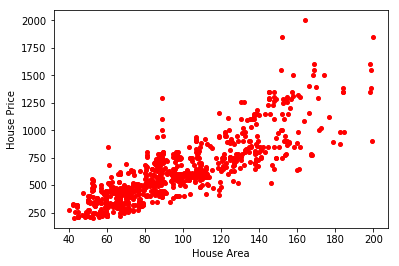

In [6]:
def plot_data(x, y):
    """绘制给定数据x与y的图像"""
    plt.figure()
    # 绘制x与y的图像
    # 使用 matplotlib.pyplt 的命令 plot, xlabel, ylabel 等。
    # 提示：可以使用 'ro' 选项使数据点显示为红色的 "o"，
    #       使用 "markersize=4, markeredgewidth=1" 使标记更大

    # 给制数据
    for i in range(len(x)):
        plt.plot(x[i],y[i],'ro',markersize=4,markeredgewidth=1)
    # 设置y轴标题为 'House Price'
    plt.ylabel('House Price')
    # 设置x轴标题为 'House Area'
    plt.xlabel('House Area')
    # =========================================================
    plt.show()
    

# 绘图
plot_data(x, y)
plt.show()

In [12]:
# Add a column of ones to x
m = len(y)
#得到归一化后的X和Y进行梯度下降
X = np.ones((m, 2))
Y=np.zeros((m,1))
X[:, 1] = normdata[:, 0]
Y[:,0]=normdata[:,1]

#未归一化的x1和y计算损失
x1 = np.ones((m, 2))
x1[:, 1] = data[:, 0]

# initialize fitting parameters
theta = np.zeros((2, 1))

# Some gradient descent settings
iterations = 20000
alpha = 0.8

In [8]:
def compute_cost(x1, y, theta):
    """计算线性回归的代价。"""
    m = len(y)
    J = 0.0

    # 计算给定 theta 参数下线性回归的代价
    ypredict=np.dot(x1,theta)
    for i in range(m):
        J=J+np.square(ypredict[i]-y[i])
    J=J/(2*m)
    return J

# compute and display initial cost
J0 = compute_cost(x1, y, theta)
print(J0)

[224056.24252874]


In [13]:
def gradient_descent(X, Y, theta, alpha, num_iters,x1,y):
    """执行梯度下降算法来学习参数 theta。"""
    m = len(Y)
    J_history = np.zeros((num_iters,))

    for iter in range(num_iters):
        # 计算给定 theta 参数下线性回归的梯度，实现梯度下降算法
        # =========================================================
        # 将各次迭代后的代价进行记录
        y1=np.dot(X,theta)
        g=np.zeros((2,1))
        g1=0
        g2=0
        for i in range(m):
            g1=g1+(y1[i]-Y[i])
            g2=g2+(y1[i]-Y[i])*X[i][1]
        g[0][0]=g1/m
        g[1][0]=g2/m
        theta=theta-alpha*g
        J_history[iter] = compute_cost(x1, y, theta)

    return theta, J_history

# run gradient descent
theta_final, J_history = gradient_descent(X, Y, theta,alpha, iterations,x1,y)
print(theta_final)
print(J_history)

[[-0.02574864]
 [ 6.97082121]]
[223056.71268745 222778.58865779 222643.23618035 ...  13117.41567188
  13117.50864796  13117.60160753]


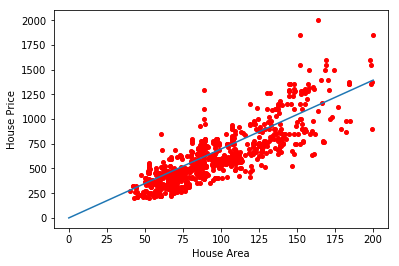

In [14]:
def plot_data(x, y,theta_final):
    """绘制给定数据x与y的图像"""
    plt.figure()
    # 绘制x与y的图像
    # 给制数据
    for i in range(len(x)):
        plt.plot(x[i],y[i],'ro',markersize=4,markeredgewidth=1)

    #绘制训练后的拟合直线
    x1=np.arange(0,200,0.01)
    y1=theta_final[0]+theta_final[1]*x1
    plt.plot(x1,y1)
    
    # 设置y轴标题为 'House Price'
    plt.ylabel('House Price')
    # 设置x轴标题为 'House Area'
    plt.xlabel('House Area')
    # =========================================================
    plt.show()
    

# 绘图
plot_data(x, y,theta_final)
plt.show()

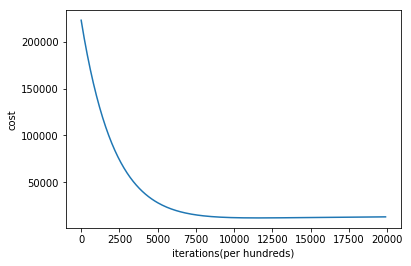

In [15]:
#绘制损失变化函数曲线
def plot_gradient_descent(J_history,iterations):
    plt.figure()
    x=[]
    y=[]
    for i in range(iterations):
        if(i%100==0):
            x.append(i)
            y.append(J_history[i])
    plt.plot(x,y)
    plt.xlabel('iterations(per hundreds)')
    plt.ylabel('cost')

#画图
plot_gradient_descent(J_history,iterations)
plt.show()